# Clustering

This section tries to cluster the different politicians based on their written words recieved from the data cleaning. The hypothesis is that the candidates will cluster together with their colleagues from their own party, but a fun tendency could be the exact opposite. 

## Data preparation

In [298]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import wikipediaapi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

df_politicians = pd.read_csv("Data/Giant.csv")
df_politicians["Tweets"] = [[w for w in word_tokenize(df_politicians["Tweets"][i]) if w.isalnum()] for i in range(len(df_politicians))]

In [ ]:
df_politicians.head()

,Party,Person,Tweets
0,socialdemokratiet,magnus_heunicke,"['promises made promises kept', 'covidsmitten ..."
1,socialdemokratiet,nicolai_wammen,['vej spændende aften gode kollegaer god valga...
2,socialdemokratiet,mattias_tesfaye,"['nytår ps vandt', 'liekaas fremragende filmen..."
3,venstre,jakob_ellemann,['fesagen skadet danmarks efterretningstjenest...
4,venstre,soren_gade,"['snothvalpen ved grimmebriller', 'sagt lige s..."


In [ ]:
wnl = nltk.WordNetLemmatizer() 
STOPWORDS = nltk.corpus.stopwords.words('danish') + ["http"]

def clean_tweet(tweet):
    tokensraw = word_tokenize(tweet) #get tokens 
    tokens = [word.lower() for word in tokensraw if word.isalnum()] #only get words and numbers
    tokens = [wnl.lemmatize(t) for t in tokens] #lemmatize tokens
    tokens = [w for w in tokens if w.lower() not in STOPWORDS] #remove stopwords
    return tokens

In [ ]:
import wikipediaapi
wiki_wiki = wikipediaapi.Wikipedia('da')


df_topic = pd.DataFrame({"topic" : ["climate_and_energy", "job_market_and_economy", "law_and_sentencing", "EU_and_international_politics", "welfare", "education", "democracy", "healthcare"]})
df_topic["wikipages"] = [
    ["klima", "energi"], # clima and energyy
    ["arbejdsmarked", "økonomi"], # arbejdsmarked and økonomi
    ["strafferet", "straf"], # ret og straf
    ["Den_Europæiske_Union", "udenrigspolitik"], # EU og udenrigs
    ["velfærd"], # velfærd
    ["uddannelse", "Statens_Uddannelsesstøtte"], # uddannelse
    ["demokrati"], # demokrati
    ["sundhed"], # sundhed
]

texts = []
for i in range(len(df_topic)):
    t = [clean_tweet(wiki_wiki.page(m).text) for m in df_topic.loc[i, "wikipages"]] 
    t = [word for words in t for word in words]
    texts += [t]
df_topic["text"] = texts

In [ ]:
df_politicians

,Party,Person,Tweets
0,socialdemokratiet,magnus_heunicke,"[made, promises, kept, falder, blandt, ældre, ..."
1,socialdemokratiet,nicolai_wammen,"[spændende, aften, gode, kollegaer, god, valga..."
2,socialdemokratiet,mattias_tesfaye,"[ps, vandt, fremragende, filmen, fremragende, ..."
3,venstre,jakob_ellemann,"[skadet, danmarks, efterretningstjeneste, lad,..."
4,venstre,soren_gade,"[ved, grimmebriller, lige, smidt, bleen, dkpol..."
5,venstre,sophie_lohde,"[store, indsats, igennem, år, ønskes, bedste, ..."
6,moderaterne,lars_lokke,"[kæmpe, tillykke, bor, ingen, sygeplejersker, ..."
7,moderaterne,henrik_frandsen,"[nåede, nyheden, landbrugspressen, foran, verd..."
8,moderaterne,rosa_eriksen,"[tager, tager, shine, tidligere, partikammerat..."
9,sf,jacob_mark,"[morten, kommer, virkelig, savne, tak, skrive,..."


In [300]:
wnl = nltk.WordNetLemmatizer() 
STOPWORDS = nltk.corpus.stopwords.words('danish') + ["http"]

def clean_tweet(tweet):
    tokensraw = word_tokenize(tweet) #get tokens 
    tokens = [word.lower() for word in tokensraw if word.isalnum()] #only get words and numbers
    tokens = [wnl.lemmatize(t) for t in tokens] #lemmatize tokens
    tokens = [w for w in tokens if w.lower() not in STOPWORDS] #remove stopwords
    return tokens

In [301]:
wiki_wiki = wikipediaapi.Wikipedia('da')


df_topic = pd.DataFrame({"topic" : ["climate_and_energy", "job_market_and_economy", "law_and_sentencing", "EU_and_international_politics", "welfare", "education", "democracy", "healthcare"]})
df_topic["wikipages"] = [
    ["klima", "energi"], # clima and energyy
    ["arbejdsmarked", "økonomi"], # arbejdsmarked and økonomi
    ["strafferet", "straf"], # ret og straf
    ["Den_Europæiske_Union", "udenrigspolitik"], # EU og udenrigs
    ["velfærd"], # velfærd
    ["uddannelse", "Statens_Uddannelsesstøtte"], # uddannelse
    ["demokrati"], # demokrati
    ["sundhed"], # sundhed
]

texts = []
for i in range(len(df_topic)):
    t = [clean_tweet(wiki_wiki.page(m).text) for m in df_topic.loc[i, "wikipages"]] 
    t = [word for words in t for word in words]
    texts += [t]
df_topic["text"] = texts

In [ ]:
df_topic

,topic,wikipages,text
0,climate_and_energy,"[klima, energi]","[ved, klimaet, vejrliget, forstås, oversigtlig..."
1,job_market_and_economy,"[arbejdsmarked, økonomi]","[arbejdsmarked, marked, arbejdskraft, købes, s..."
2,law_and_sentencing,"[strafferet, straf]","[strafferet, betegner, juridiske, disciplin, o..."
3,EU_and_international_politics,"[Den_Europæiske_Union, udenrigspolitik]","[europæiske, union, eu, økonomisk, politisk, u..."
4,welfare,[velfærd],"[ordet, velfærd, betyder, individet, mest, øns..."
5,education,"[uddannelse, Statens_Uddannelsesstøtte]","[uddannelse, udtryk, både, benyttes, uformelle..."
6,democracy,[demokrati],"[demokrati, oldgræsk, δημοκρατία, romaniseret,..."
7,healthcare,[sundhed],"[få, ingen, kildehenvisninger, artikel, hvilke..."


In [303]:
def jaccard_similarity(x,y):
  """ returns the jaccard similarity between two lists """
  intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
  union_cardinality = len(set.union(*[set(x), set(y)]))
  return intersection_cardinality/float(union_cardinality)

In [304]:
df_similarity = pd.DataFrame(columns=df_topic.topic)
for i in range(len(df_politicians)):
    for j in range(len(df_topic)):
        df_similarity.loc[df_politicians.Person[i],df_topic.topic[j]] = jaccard_similarity(df_politicians.Tweets[i], df_topic.text[j])

df_similarity.fillna(0, inplace=True)

In [305]:
vectorizer = TfidfVectorizer(stop_words=STOPWORDS, 
# max_features= 1000, # keep top 1000 terms 
ngram_range=(1,1),
#max_df = 0.5, # ignore terms with larger than 0.5 as this likely a stopword
smooth_idf=True)

X = vectorizer.fit_transform(df_politicians.Tweets.apply(lambda x: " ".join(x)))

print("Number of stopwords removed; ", len(set(df_politicians.Tweets.sum())) - X.shape[1])
print("Number of words in new corpus: ", X.shape[1])


Number of stopwords removed;  134
Number of words in new corpus:  72040


In [ ]:
cos_sim = pd.DataFrame(cosine_similarity(X), columns=df_politicians.Person, index=df_politicians.Person)
cos_sim.index.name = None

unfiltered = pd.concat([df_similarity, cos_sim], axis=1)
combined_df = unfiltered.copy()
combined_df.drop(['rosa_eriksen', 'henrik_frandsen'], inplace=True)
combined_df.drop(['rosa_eriksen', 'henrik_frandsen'], axis=1, inplace=True)
combined_df

,climate_and_energy,job_market_and_economy,law_and_sentencing,EU_and_international_politics,welfare,education,democracy,healthcare,magnus_heunicke,nicolai_wammen,...,katrine_robsoe,pernille_vermund,lars_mathiesen,kim_andersen,franciska_rosenkilde,christina_olumeko,torsten_gejl,morten_messerschmidt,pia_kjarsgaard,peter_kofod
magnus_heunicke,0.048951,0.049020,0.007345,0.054701,0.020082,0.029204,0.101740,0.009983,1.000000,0.327875,...,0.533060,0.543959,0.443600,0.500222,0.449536,0.482391,0.561541,0.452481,0.519455,0.393237
nicolai_wammen,0.063599,0.066246,0.011850,0.084525,0.034985,0.045237,0.115726,0.020785,0.327875,1.000000,...,0.594425,0.441609,0.603598,0.424793,0.615107,0.383283,0.656934,0.757548,0.801022,0.741103
mattias_tesfaye,0.043508,0.047820,0.007456,0.056358,0.019089,0.030957,0.107514,0.009629,0.619436,0.679585,...,0.697901,0.642177,0.652333,0.601199,0.643149,0.573462,0.752550,0.735396,0.801941,0.664667
jakob_ellemann,0.053343,0.055754,0.008723,0.061990,0.022925,0.032997,0.121868,0.012180,0.653195,0.372350,...,0.605315,0.599586,0.601760,0.719339,0.517940,0.618269,0.655816,0.574249,0.624932,0.472103
soren_gade,0.063431,0.079252,0.021970,0.092553,0.042657,0.059932,0.089178,0.028129,0.357408,0.595055,...,0.519714,0.422502,0.477272,0.383794,0.502169,0.363869,0.547214,0.675671,0.628757,0.611656
sophie_lohde,0.051781,0.054428,0.008805,0.064396,0.021300,0.033827,0.116543,0.012319,0.586050,0.677844,...,0.705972,0.620504,0.691430,0.653922,0.645681,0.581224,0.756712,0.744337,0.810489,0.670549
lars_lokke,0.045738,0.047921,0.006270,0.058150,0.019231,0.028787,0.105047,0.009230,0.623091,0.484622,...,0.555375,0.542291,0.544505,0.569492,0.500702,0.518963,0.610817,0.620912,0.633405,0.503726
jacob_mark,0.051564,0.053463,0.008035,0.060049,0.021056,0.036550,0.113002,0.012295,0.611572,0.608687,...,0.759105,0.624821,0.711167,0.724965,0.658532,0.649750,0.788753,0.712350,0.788998,0.644879
pia_dyhr,0.053217,0.053480,0.008530,0.064430,0.020887,0.036660,0.112367,0.011673,0.641777,0.597698,...,0.711730,0.615286,0.640483,0.635612,0.655945,0.608987,0.775402,0.686581,0.749134,0.622987
kirsten_andersen,0.053736,0.058874,0.008541,0.064955,0.023785,0.035519,0.120890,0.013011,0.575181,0.586957,...,0.620975,0.499658,0.606564,0.590382,0.572140,0.528113,0.666432,0.633479,0.696825,0.586520


In [307]:
#Dropping the politicians with not so many tweets as they scew the results
df_pol_new = df_politicians.copy()
df_pol_new.drop([7,8], inplace=True)

## Kmeans clustering without PCA

In [308]:
kmeans = KMeans(n_clusters=12, random_state=0).fit(combined_df)
label = kmeans.labels_

In [309]:
label

array([ 7,  2,  0,  4, 11,  0,  7,  0,  0,  8,  9,  5,  7,  9,  1,  6,  5,
        9,  1,  1,  5,  9,  2,  5,  8,  3, 10,  4,  8,  4,  0,  5,  5,  2],
      dtype=int32)

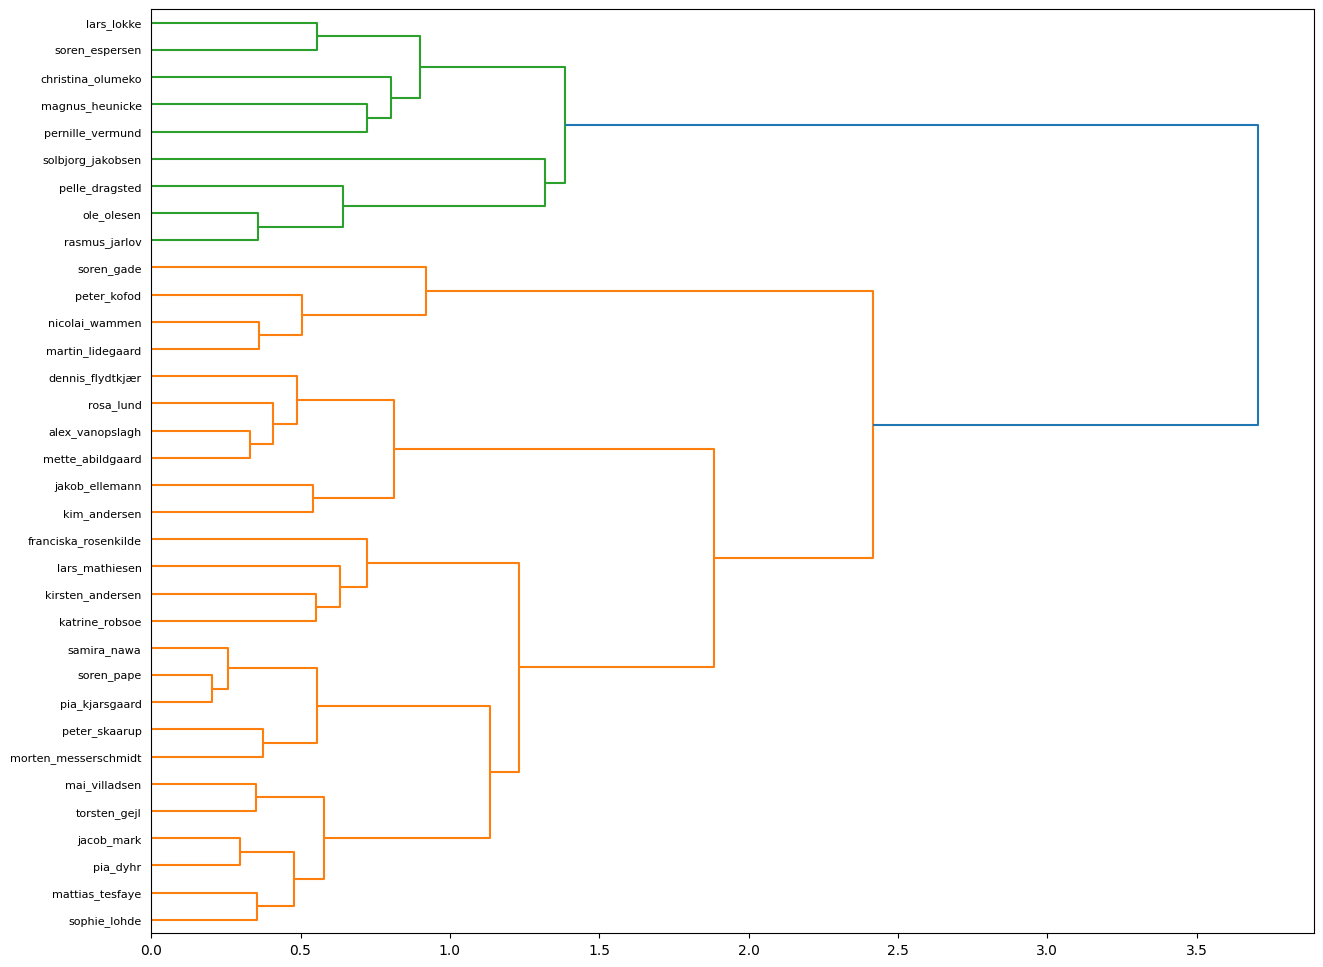

In [310]:
dendo_data = combined_df
linked = linkage(dendo_data, 'ward')

labelList = df_pol_new['Person'].values
#labelList = df_politicians['Person'].values

plt.figure(figsize=(15, 12))
dendrogram(
            linked,
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=False
          )
plt.show()

## Kmeans Clustering with PCA

In [289]:
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(combined_df)

In [290]:
kmeans = KMeans(n_clusters=12, random_state=0).fit(df)
label = kmeans.labels_

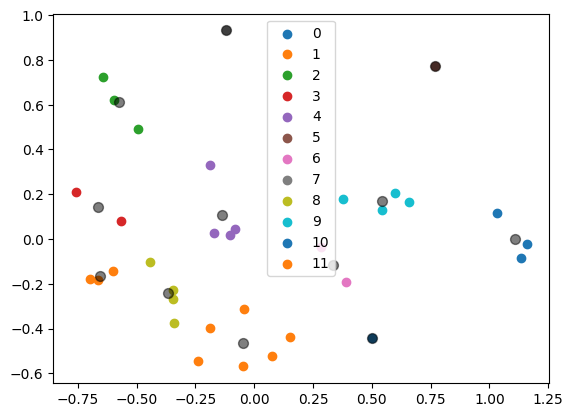

In [291]:
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 50, alpha=0.5, color = 'k')
plt.legend()
plt.show()

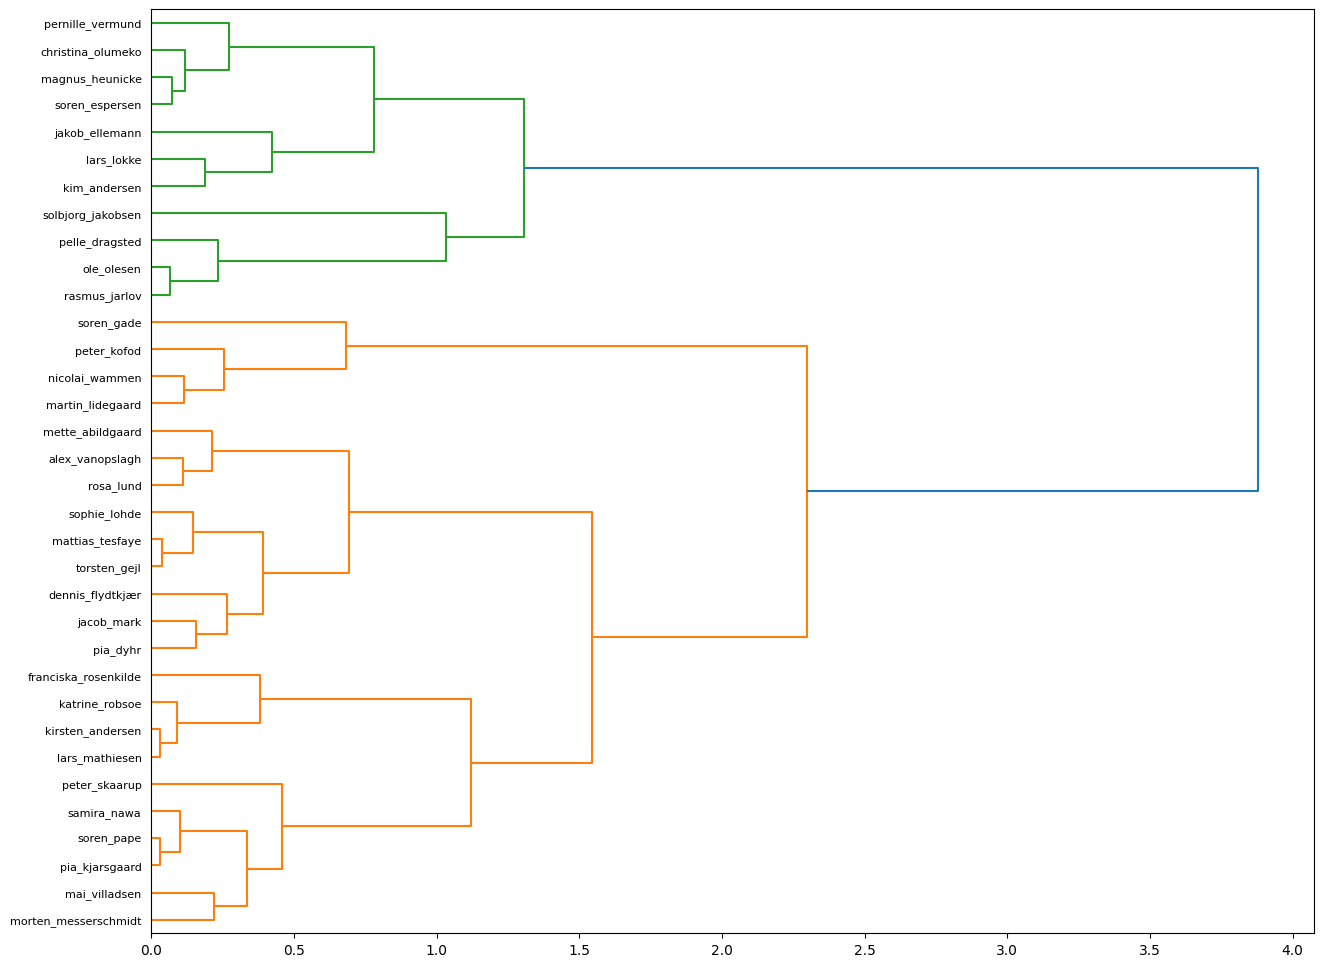

In [292]:
dendo_data = df
linked = linkage(dendo_data, 'ward')

labelList = df_pol_new['Person'].values

plt.figure(figsize=(15, 12))
dendrogram(
            linked,
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=False
          )
plt.show()

In [293]:
df_pol_new["HCA"] = HCA(df, 12)
df_pol_new["Kmeans"] = kmeans.labels_

df_pol_new

,Party,Person,Tweets,HCA,Kmeans
0,socialdemokratiet,magnus_heunicke,"[made, promises, kept, falder, blandt, ældre, ...",3,9
1,socialdemokratiet,nicolai_wammen,"[spændende, aften, gode, kollegaer, god, valga...",4,2
2,socialdemokratiet,mattias_tesfaye,"[ps, vandt, fremragende, filmen, fremragende, ...",0,8
3,venstre,jakob_ellemann,"[skadet, danmarks, efterretningstjeneste, lad,...",11,10
4,venstre,soren_gade,"[ved, grimmebriller, lige, smidt, bleen, dkpol...",9,7
5,venstre,sophie_lohde,"[store, indsats, igennem, år, ønskes, bedste, ...",0,8
6,moderaterne,lars_lokke,"[kæmpe, tillykke, bor, ingen, sygeplejersker, ...",5,6
9,sf,jacob_mark,"[morten, kommer, virkelig, savne, tak, skrive,...",0,1
10,sf,pia_dyhr,"[gjort, stop, spind, pelle, ved, børn, unges, ...",0,1
11,sf,kirsten_andersen,"[samarbejdet, gensyn, derude, indsatsen, held,...",2,4


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=30797f9c-952e-45b4-98d4-31c9ac73ae78' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

## Heatmap of politicians

<AxesSubplot:xlabel='Person'>

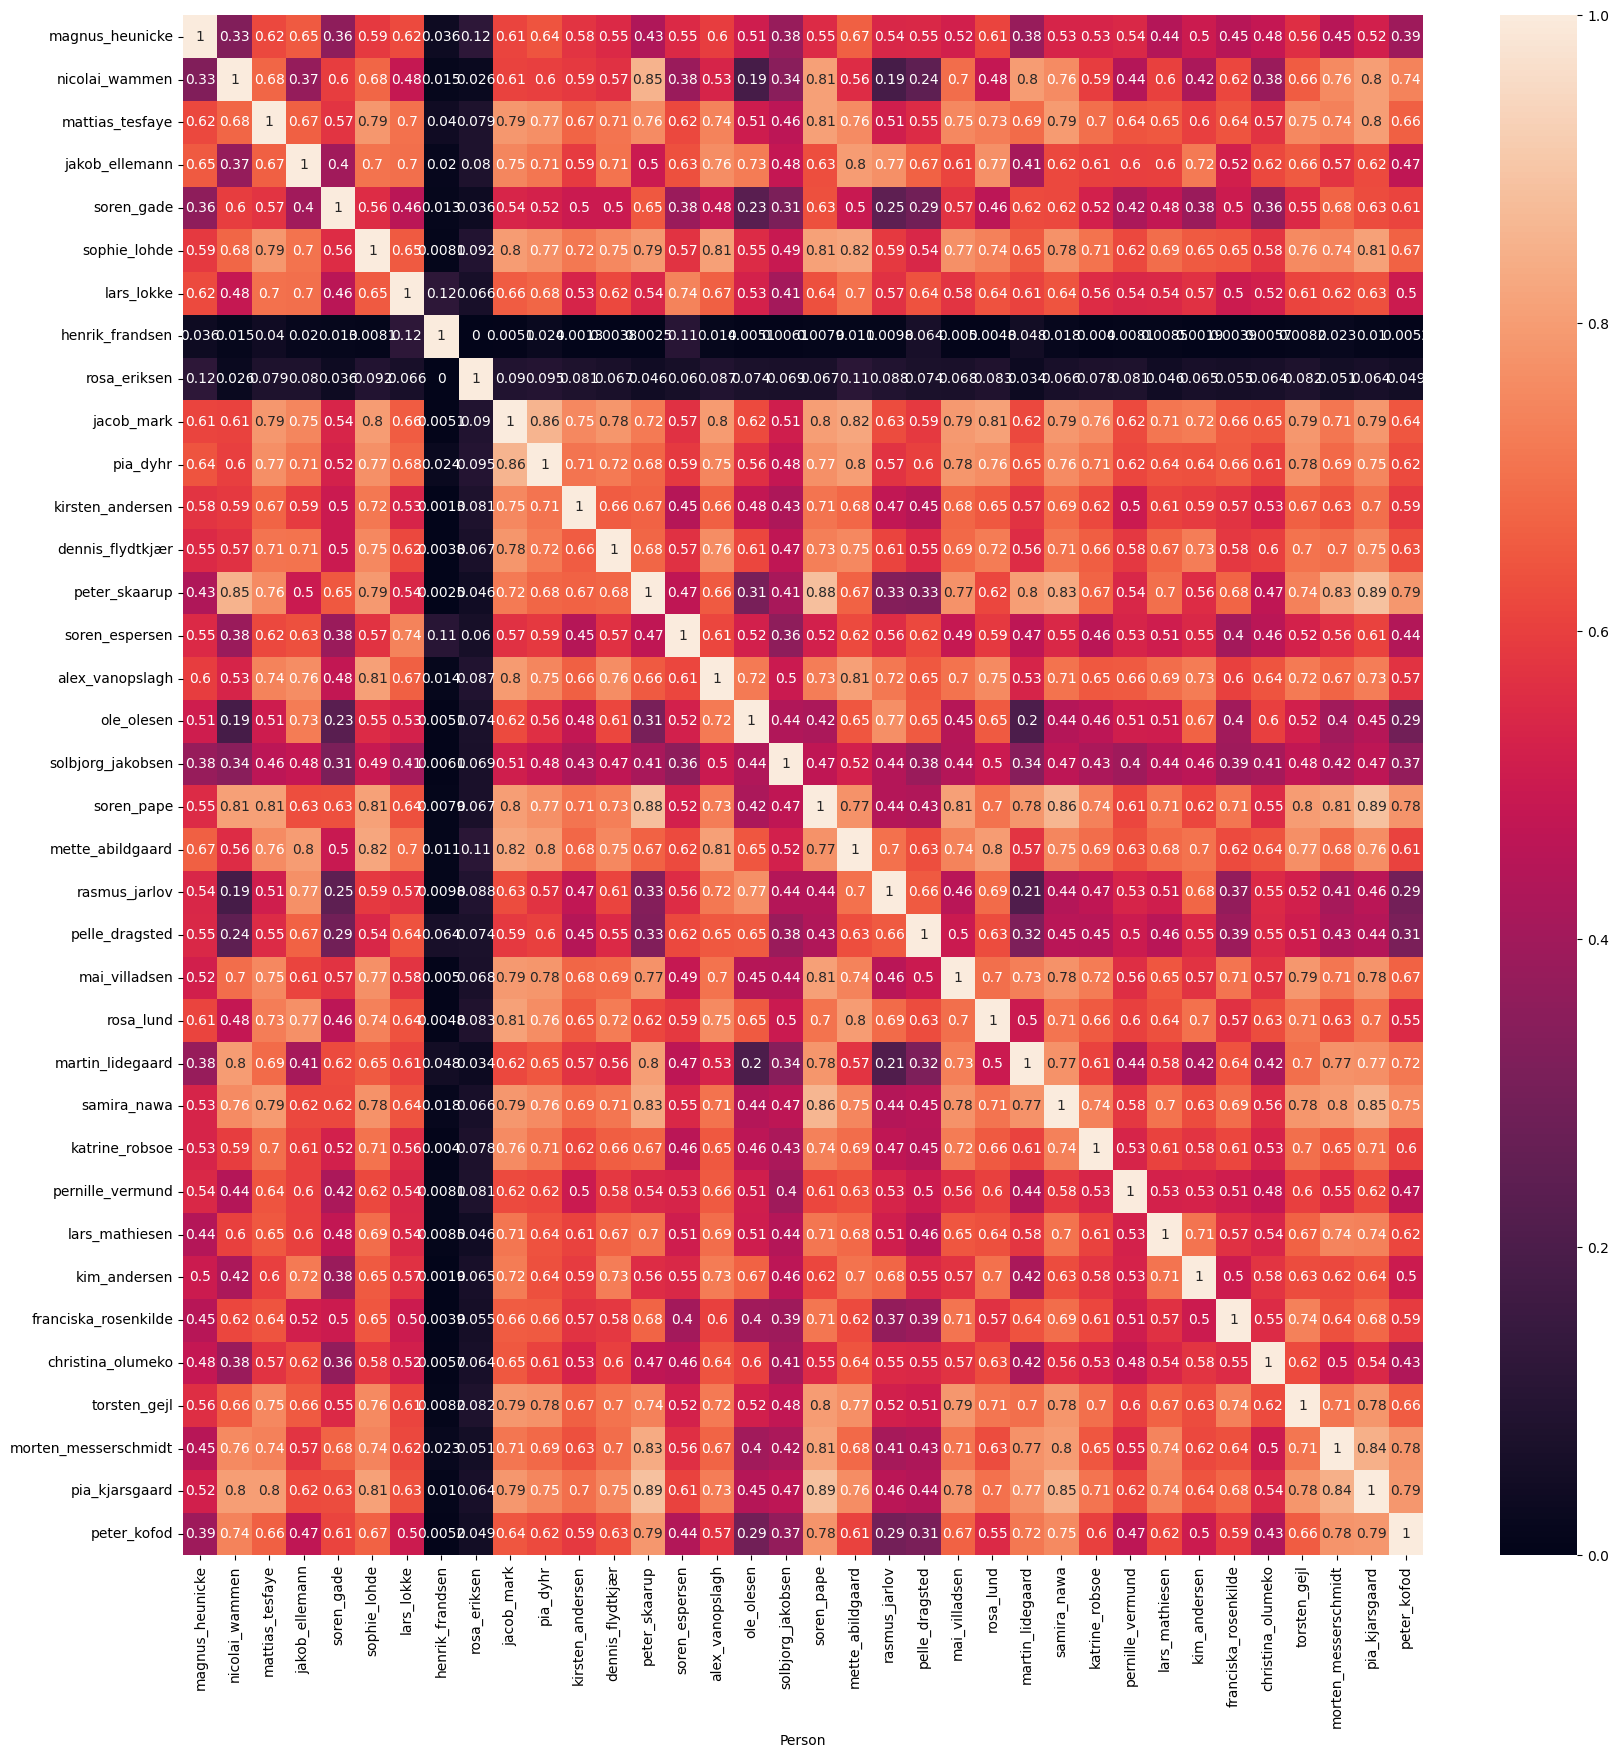

In [296]:
heatmap_data = cos_sim.copy()

fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(heatmap_data, ax=ax, xticklabels=True, yticklabels=True, annot=True)
